In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('dataset/Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
cat_cols = ['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


In [4]:
df.dropna()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,13,3.0,54,False,False,False,False,False,False,True,False,False,True,False
996,271,16.28,8,9.0,71,False,True,False,False,True,False,False,True,False,False,True
997,861,15.62,26,2.0,81,False,False,True,False,False,False,True,False,False,False,True
998,436,14.17,8,0.0,55,False,False,False,False,True,False,False,False,False,False,False


In [5]:
df = df.drop(columns=['Order_ID'])
df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


In [6]:
avg = df['Courier_Experience_yrs'].mean()
df['Courier_Experience_yrs'].fillna(avg, inplace=True)

C:\Users\Maharshi\AppData\Local\Temp\ipykernel_19692\3767755336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier_Experience_yrs'].fillna(avg, inplace=True)


In [7]:
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [10]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
print("Train R^2:", rf.score(X_train, y_train))
print("Test R^2:", rf.score(X_test, y_test))

Train R^2: 0.9591356078868444
Test R^2: 0.7180423994474585


In [12]:
y_pred = rf.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f'Mean square error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')

Mean square error: 121.78067066666668
Mean Absolute Error: 7.374933333333334
Root Mean Square Error: 11.035427978409658


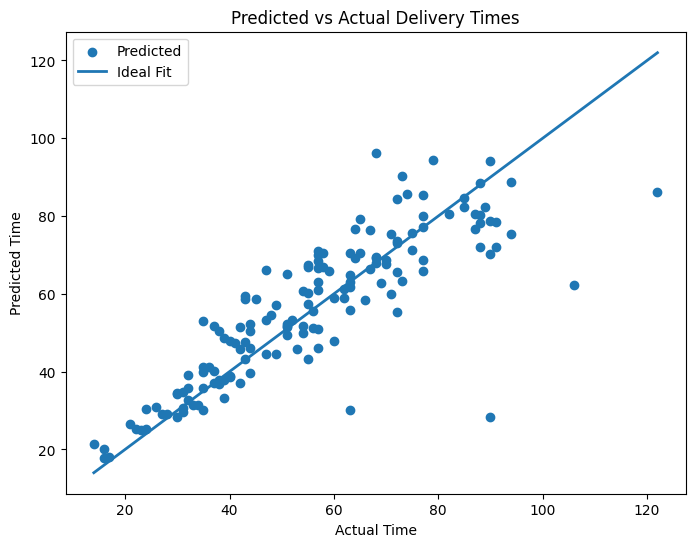

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, label='Ideal Fit')
plt.xlabel('Actual Time')
plt.ylabel('Predicted Time')
plt.title('Predicted vs Actual Delivery Times')
plt.legend()
plt.show()